In [2]:
from sklearn.cluster import KMeans

import numpy as np

np.random.seed(42)
data1 = np.random.randn(100, 2) + [2,2]
data2 = np.random.randn(100, 2) + [-2.-2]
data3 = np.random.randn(100, 2) + [2, -2]

X = np.vstack((data1, data2, data3))

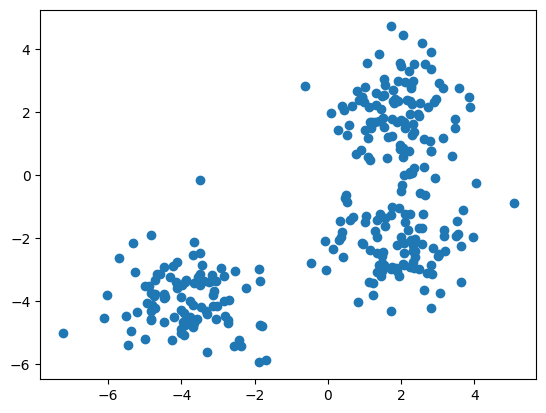

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [7]:
# 예측한 결과
labels = kmeans.labels_

# 중심점
centroids = kmeans.cluster_centers_
centroids

array([[-3.83808685, -3.94503099],
       [ 1.93171598, -0.03230221]])

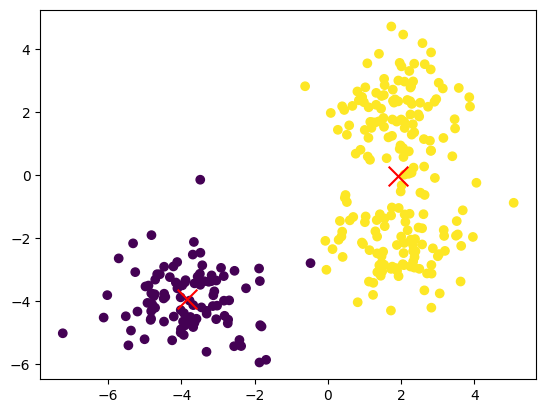

In [12]:
plt.scatter(X[:,0], X[:,1], c=labels)
# 중심점 위치 표시
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200, label='centroids')
plt.show()

In [15]:
new_data = np.array([[0, 0], [3, 3], [-3, -3], [2, -3]])
new_labels = kmeans.predict(new_data)
new_labels

array([1, 1, 0, 1], dtype=int32)

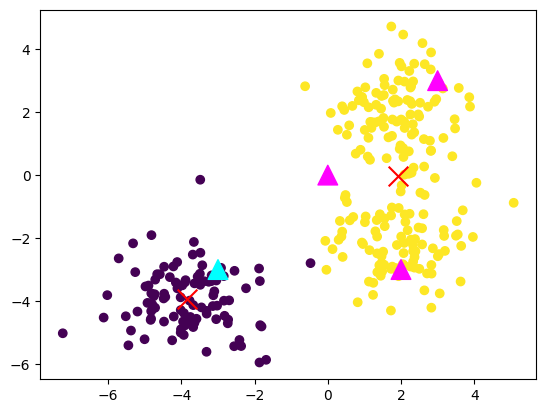

In [18]:
plt.scatter(X[:,0], X[:,1], c=labels)
# 중심점 위치 표시
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200, label='centroids')
# 테스트 데이터
plt.scatter(new_data[:,0], new_data[:,1], s=200, c=new_labels, marker='^', cmap='cool')
plt.show()

In [24]:
kmeans1 = KMeans(n_clusters=3, random_state=0)
kmeans1.fit(X)

KMeans(n_clusters=3, random_state=0)

In [29]:
# 예측한 결과
labels1 = kmeans1.labels_
new_label = kmeans1.predict(new_data)

# 중심점
centroids1 = kmeans1.cluster_centers_
centroids1

array([[-3.87175128, -3.95651235],
       [ 1.94462964, -2.17319757],
       [ 1.89574638,  1.99753261]])

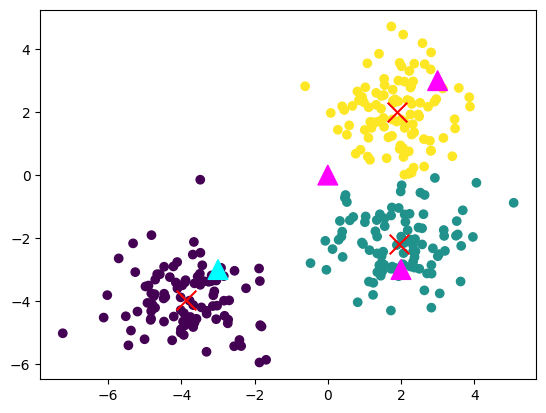

In [28]:
plt.scatter(X[:,0], X[:,1], c=labels1)
# 중심점 위치 표시
plt.scatter(centroids1[:,0], centroids1[:,1], c='red', marker='x', s=200, label='centroids')
# 테스트 데이터
plt.scatter(new_data[:,0], new_data[:,1], s=200, c=new_labels, marker='^', cmap='cool')
plt.show()

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
# 실루엣 점수 계산
silhouette_avg = silhouette_score(X, labels1)
sample_silhouette_values = silhouette_samples(X, labels1)
sample_silhouette_values[:10]

array([0.68126   , 0.65862503, 0.70119288, 0.59434217, 0.72592133,
       0.66471436, 0.14671437, 0.51035068, 0.68686113, 0.37644687])

In [32]:
# 점수가 높을수록 군집화가 잘된 상태
silhouette_avg

np.float64(0.6302542655407574)

# DBSCAN

In [36]:
from sklearn.datasets import make_blobs  # 부족한 데이터 생성용 패키지

#중심점 설정 > 데이터 생성을  위한 > dbscan에 설정하는 것은 아님.
centers = [[1, 1], [-1, -1], [1, -1]]

# 실습용 데이터 생성하기
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X.shape, labels_true.shape

((750, 2), (750,))

In [37]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [39]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# DBSCAN 모델 정의 및 학습하기
db = DBSCAN(eps=0.3, min_samples=10)
labels_db = db.fit_predict(X)
labels_db[:100]

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0, -1,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0])

In [45]:
# 생성된 클러스터의 종류(집합)
unique_labels = set(labels_db)

In [44]:
# 노이즈의 개수
list(labels_db).count(-1) 

22

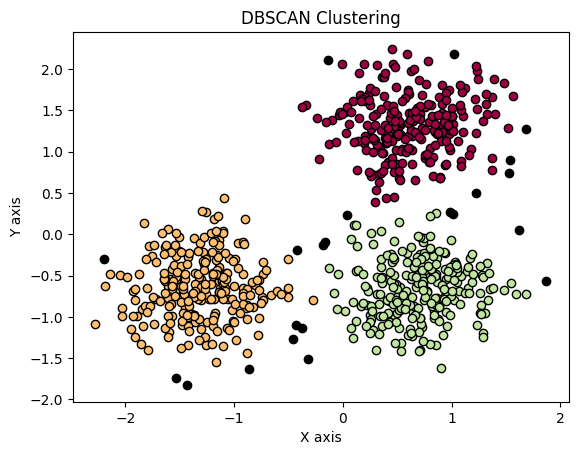

In [47]:
# 결과 시각화
# 색상 (스펙트럼) 설정
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # 노이즈는 검은색으로 표시
        col = [0, 0, 0, 1]

    # 현재 클러스터(k)에 속하는 데이터 마스크 설정
    class_member_mask = (labels_db == k)
    # 현재 클러스터(k)에 속하는 데이터 포인트 추출
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()